In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as TTS

from sklearn.preprocessing import StandardScaler as SS

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import  DecisionTreeClassifier as DTC

from sklearn.metrics import accuracy_score as AS

In [5]:
data = pd.read_csv('Social_Network_Ads.csv', usecols = ['Age', 'EstimatedSalary', 'Purchased'])
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
x = data.iloc[:, :2]
y = data['Purchased']

In [9]:
trainx, testx, trainy, testy = TTS(x, y, test_size = 0.2, random_state=42)

trainx.shape, testx.shape

((320, 2), (80, 2))

#**Feature Scaling using StandardScaling**

In [10]:
scaler = SS()

scaler.fit(trainx)

trainx_trans = scaler.transform(trainx)
testx_trans = scaler.transform(testx)

In [11]:
trainx_trans = pd.DataFrame(trainx_trans, columns = trainx.columns)
testx_trans = pd.DataFrame(testx_trans, columns = testx.columns)

In [12]:
trainx_trans

,Age,EstimatedSalary
0,-1.066752,-0.386344
1,0.797535,-1.229939
2,0.110692,1.853544
3,0.601294,-0.909955
4,1.876859,-1.288118
...,...,...
315,-1.361114,-1.259028
316,-1.164873,-1.026312
317,0.503174,1.824455
318,0.110692,0.195445


#**Effect of Scalning**

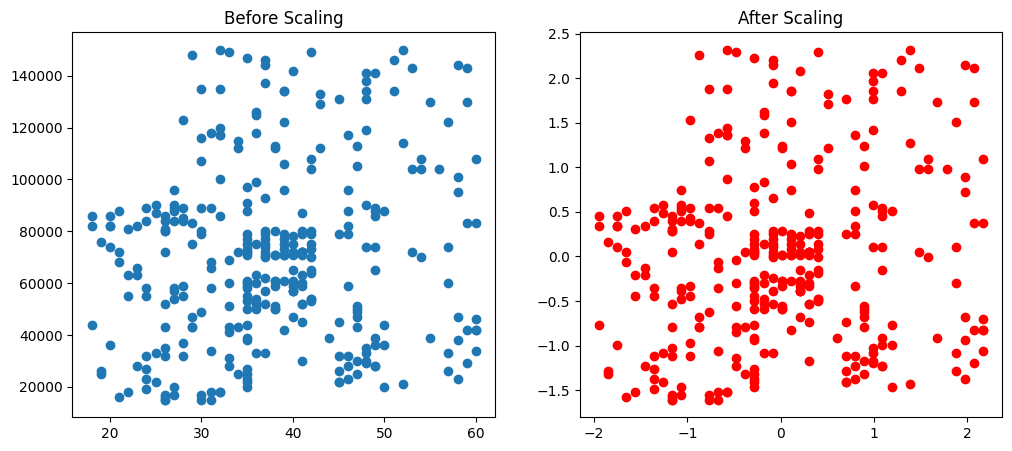

In [21]:
(axis1, axis2) = plt.subplots()

axis1.scatter(trainx['Age'], trainx['EstimatedSalary'])
axis1.set_title('Before Scaling')
axis2.scatter(trainx_trans['Age'], trainx_trans['EstimatedSalary'])
axis2.set_title('After Scaling')

plt.show()

#**Why the Scaling acctualy matter ???**

In [26]:
lr = LR()
lr_trans = LR()

lr.fit(trainx, trainy)
lr_trans.fit(trainx_trans, trainy)

lr_pred = lr.predict(testx)
lr_trans_pred = lr_trans.predict(testx_trans)

In [27]:
print("Actual: ", AS(testy, lr_pred))
print("Sacaled: ",AS(testy, lr_trans_pred))

Actual:  0.8875
Sacaled:  0.8625
